## **Salescope — Business Analytics Project**

### **Project Summary**

This exploratory data analysis (EDA) examines **Salescope’s** sales dataset for the years **2020–2024**, uncovering performance drivers, trends, and actionable insights. The analysis covers:  

- **Data Profiling & Cleaning:** Validated schema integrity, resolved missing budget entries, and standardized data types.  
- **Univariate & Bivariate Analysis:** Explored key metrics (revenue, margin, unit price) alongside product, channel, region, and customer segment breakdowns.  
- **Trend & Seasonality:** Visualized monthly and yearly sales patterns to reveal recurring peaks, troughs, and demand cycles.  
- **Outlier Detection:** Flagged extreme transactions on both high and low ends of revenue and unit price.  
- **Correlation & Segmentation:** Identified relationships between performance metrics and segmented customers based on revenue and profit margin profiles.  

---

### **Objective**

To generate actionable business intelligence from Salescope’s sales data, enabling data-driven decision-making by:  

1. **Identifying growth drivers** — Top-performing products, sales channels, and regions boosting revenue and profitability.  
2. **Uncovering seasonal patterns** — Recognizing demand cycles and anomalies for better inventory, marketing, and resource planning.  
3. **Mitigating financial risks** — Detecting pricing and margin vulnerabilities caused by outlier transactions.  
4. **Guiding strategic initiatives** — Supporting pricing optimization, targeted promotions, and market-expansion opportunities.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sheets = pd.read_excel('/home/grey/salescope/data/Regional Sales Dataset.xlsx',sheet_name = None)

In [3]:
# Assign to named DataFrames
df_sales       = sheets['Sales Orders']
df_customers   = sheets['Customers']
df_products    = sheets['Products']
df_regions     = sheets['Regions']
df_state_reg   = sheets['State Regions']
df_budgets     = sheets['2017 Budgets']

In [4]:
# shape of data
print(f"Sales: {df_sales.shape}")
print(f"Customers: {df_customers.shape}")
print(f"Products: {df_products.shape}")
print(f"Regions: {df_regions.shape}")
print(f"State Regions: {df_state_reg.shape}")
print(f"Budgets: {df_budgets.shape}")

Sales: (64104, 12)
Customers: (175, 2)
Products: (30, 2)
Regions: (994, 15)
State Regions: (48, 3)
Budgets: (30, 2)


In [5]:
# Preview and check missing values for all sheets

datasets = {
    "Sales": df_sales,
    "Customers": df_customers,
    "Products": df_products,
    "Regions": df_regions,
    "State Regions": df_state_reg,
    "Budgets": df_budgets
}

for name, df in datasets.items():
    print(f"\n{'='*20} {name} {'='*20}")
    display(df.head())
    print("\nMissing Values:")
    print(df.isnull().sum())



==================== Sales ====================


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270



Missing Values:
OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

==================== Customers ====================


,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd



Missing Values:
Customer Index    0
Customer Names    0
dtype: int64

==================== Products ====================


,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5



Missing Values:
Index           0
Product Name    0
dtype: int64

==================== Regions ====================


,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago



Missing Values:
id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

==================== State Regions ====================


,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West



Missing Values:
State Code    0
State         0
Region        0
dtype: int64

==================== Budgets ====================


,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542



Missing Values:
Product Name    0
2017 Budgets    0
dtype: int64


### Data Cleaning and filtering

In [107]:
# DATA MERGING

#  Merge with Customers
df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

#  Merge with Products
df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

#  Merge with Regions
df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

#  Merge with State Regions
df = df.merge(
    df_state_reg[["State Code","Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

#  Merge with Budgets
df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

#  Clean up redundant columns
cols_to_drop = [
    'Customer Index', 'Index', 'id', 'State Code',
]
df = df.drop(columns=cols_to_drop, errors='ignore')

In [108]:
# Convert all column names to lowercase for consistency and easier access
df.columns = df.columns.str.lower()

# Display the updated list of column names
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

### Droping Unnecessary and repetative columns and rename for clarity(with region)

In [119]:
df.to_csv('Merged.csv')

In [109]:
print(df.columns.tolist())

['ordernumber', 'orderdate', 'customer name index', 'channel', 'currency code', 'warehouse code', 'delivery region index', 'product description index', 'order quantity', 'unit price', 'line total', 'total unit cost', 'customer names', 'product name', 'name', 'county', 'state_code', 'state', 'type', 'latitude', 'longitude', 'area_code', 'population', 'households', 'median_income', 'land_area', 'water_area', 'time_zone', 'region', '2017 budgets']


In [110]:
cols_to_keep = [
    'ordernumber',        # unique order ID
    'orderdate',          # date when the order was placed
    'customer names',     # customer who placed the order
    'channel',            # sales channel (e.g., Wholesale, Distributor)
    'product name',       # product purchased
    'order quantity',     # number of units ordered
    'unit price',         # price per unit
    'line total',         # revenue for this line item (qty × unit_price)
    'total unit cost',    # company’s cost for this line item
    'state_code',         # two-letter state code
    'state',              # full state name
    'region',             # broader U.S. region (e.g., South, West)
    'latitude',           # latitude of delivery city
    'longitude',          # longitude of delivery city
    '2017 budgets'        # budget target for this product in 2017
]

In [111]:
# Subset the DataFrame to only these columns
df = df[cols_to_keep]

In [112]:
df.head()

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [113]:
# 2) Rename to more  self-explanatory names, including region
df = df.rename(columns={
    'ordernumber'      : 'order_number',   # snake_case for consistency
    'orderdate'        : 'order_date',     # date of the order
    'customer names'   : 'customer_name',  # customer who placed it
    'product name'     : 'product_name',   # product sold
    'order quantity'   : 'quantity',       # units sold
    'unit price'       : 'unit_price',     # price per unit in USD
    'line total'       : 'revenue',        # revenue for the line item
    'total unit cost'  : 'cost',           # cost for the line item
    'state_code'       : 'state',          # two-letter state code
    'state'            : 'state_name',     # full state name
    'region'           : 'us_region',      # U.S. region
    'latitude'         : 'lat',            # latitude (float)
    'longitude'        : 'lon',            # longitude (float)
    '2017 budgets'     : 'budget'          # 2017 budget target (float)
})

In [114]:
df.head(5)

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [115]:
# Blank out budgets for non-2020 orders
df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

# Inspect
df[['order_date','product_name','revenue','budget']].head(5)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [117]:
df[['order_date','product_name','revenue','budget']].tail(5)

,order_date,product_name,revenue,budget
64099,2018-02-28,Product 26,21788.4,NaN
64100,2018-02-28,Product 21,5185.8,NaN
64101,2018-02-28,Product 13,43483.0,NaN
64102,2018-02-28,Product 20,27717.9,NaN
64103,2018-02-28,Product 15,7986.4,NaN


In [118]:
df.to_csv('Wrangled.csv')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_number   64104 non-null  object        
 1   order_date     64104 non-null  datetime64[ns]
 2   customer_name  64104 non-null  object        
 3   channel        64104 non-null  object        
 4   product_name   64104 non-null  object        
 5   quantity       64104 non-null  int64         
 6   unit_price     64104 non-null  float64       
 7   revenue        64104 non-null  float64       
 8   cost           64104 non-null  float64       
 9   state          64104 non-null  object        
 10  state_name     64104 non-null  object        
 11  us_region      64104 non-null  object        
 12  lat            64104 non-null  float64       
 13  lon            64104 non-null  float64       
 14  budget         15263 non-null  float64       
dtypes: datetime64[ns](1

In [123]:
df.isnull().sum()

order_number         0
order_date           0
customer_name        0
channel              0
product_name         0
quantity             0
unit_price           0
revenue              0
cost                 0
state                0
state_name           0
us_region            0
lat                  0
lon                  0
budget           48841
dtype: int64

### Feature Engineering

In [124]:
# 1. Calculate total cost for each line item
df['total_cost'] = df['quantity'] * df['cost']

In [125]:
# 2. Calculate profit as revenue minus total_cost
df['profit'] = df['revenue'] - df['total_cost']

# 3. Calculate profit margin as a percentage
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

In [136]:
df.head()

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,2014-01
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,2014-01
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,2014-01
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,2014-01
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,2014-01


In [ ]:
# 4. Extract full month name from order_date for labeling (e.g., 'January', 'February')
df['order_month_name'] = df['order_date'].dt.month_name()

# 5. Extract month number from order_date for correct sorting (1–12)
df['order_month_num'] = df['order_date'].dt.month

### EDA

target variable -> 

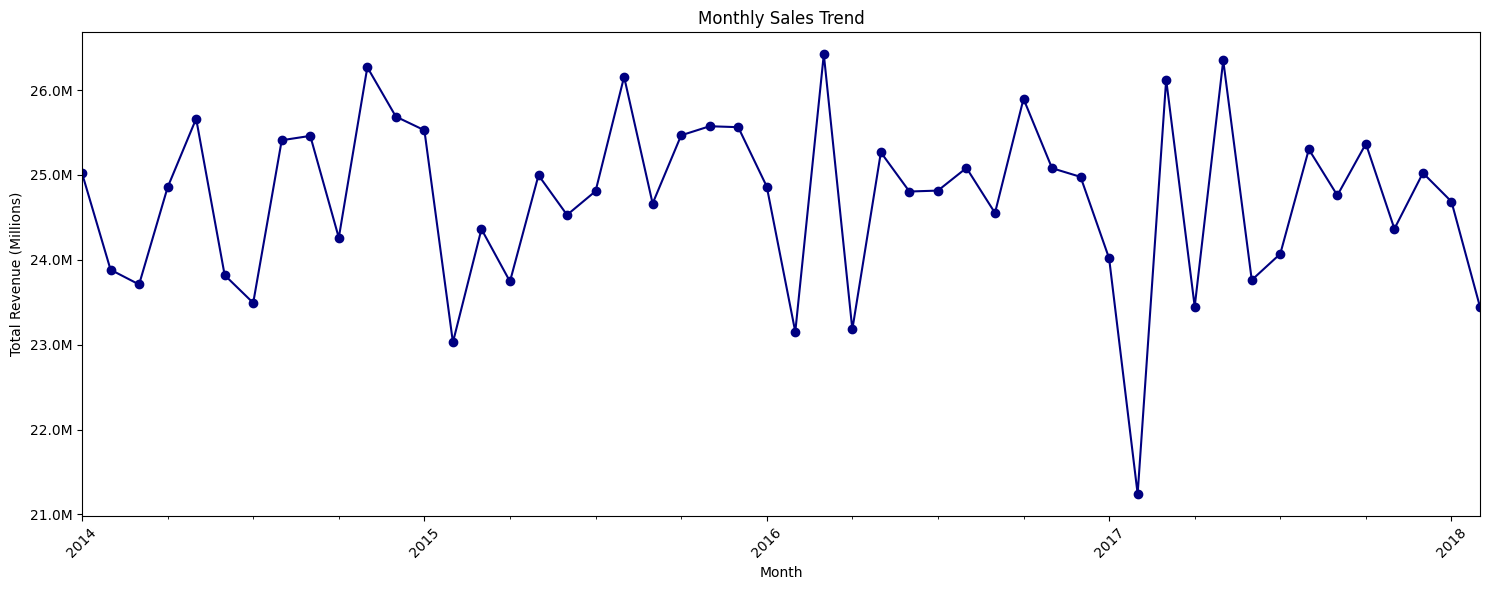

In [135]:
# Line chart montly sales trend over time

df['order_month'] = df['order_date'].dt.to_period('M')

# Calculate total revenue for each month
monthly_sales = df.groupby('order_month')['revenue'].sum()


plt.figure(figsize=(15,6))

monthly_sales.plot(marker='o', color='navy')

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

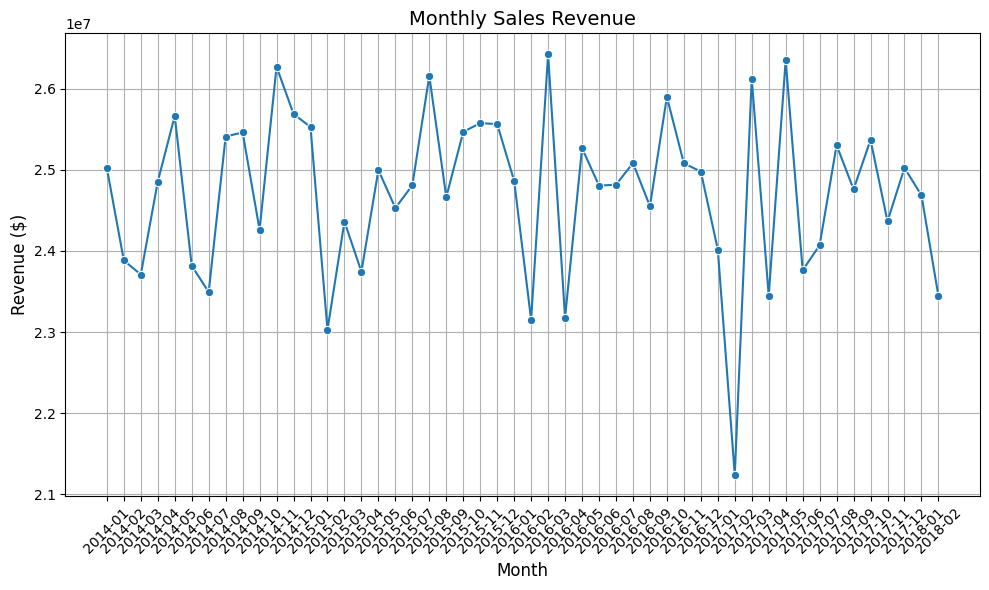

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract year and month for grouping
df['year_month'] = df['order_date'].dt.to_period('M')

# Aggregate revenue by year_month
monthly_sales = df.groupby('year_month')['revenue'].sum().reset_index()

# Convert year_month back to string for plotting
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)

# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='year_month', y='revenue', marker='o')
plt.title('Monthly Sales Revenue', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [142]:
df['order_date'] = pd.to_datetime(df['order_date'])

# Remove records from January and February 2018
df_new = df[~((df['order_date'].dt.year == 2018) & (df['order_date'].dt.month.isin([1, 2])))]

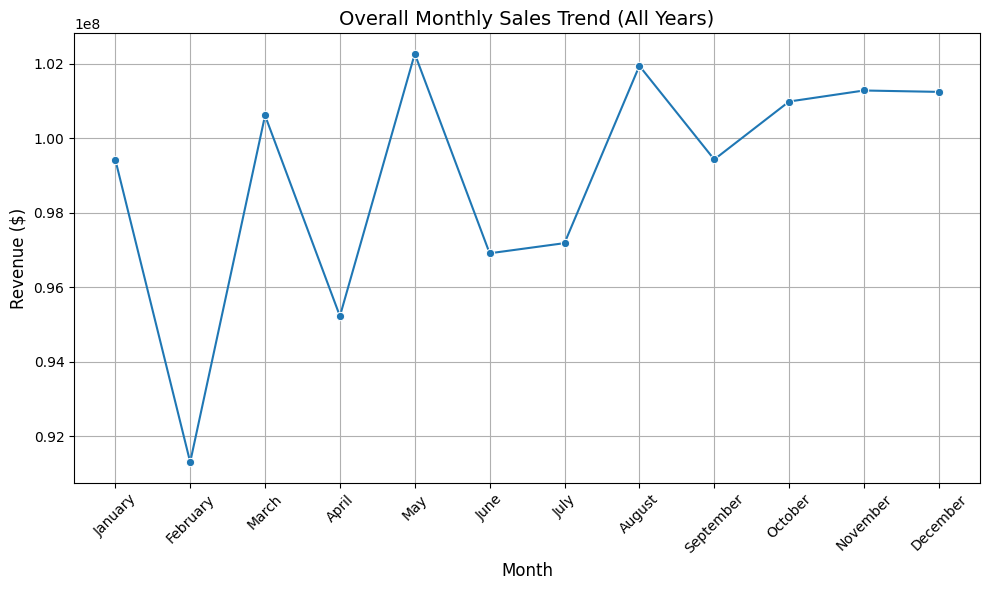

In [143]:
df_new['order_date'] = pd.to_datetime(df_new['order_date'])

# Extract month name for grouping
df_new['month'] = df_new['order_date'].dt.strftime('%B')

# Aggregate revenue by month across all years
monthly_trend = df_new.groupby('month')['revenue'].sum().reset_index()

# Sort months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=month_order, ordered=True)
monthly_trend = monthly_trend.sort_values('month')

# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_trend, x='month', y='revenue', marker='o')
plt.title('Overall Monthly Sales Trend (All Years)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [144]:
df.to_csv('final.csv')

## top 10 revenue genreate producst

/tmp/ipykernel_17403/2846486579.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_name', y='revenue', data=top_10_products, palette='tab10')


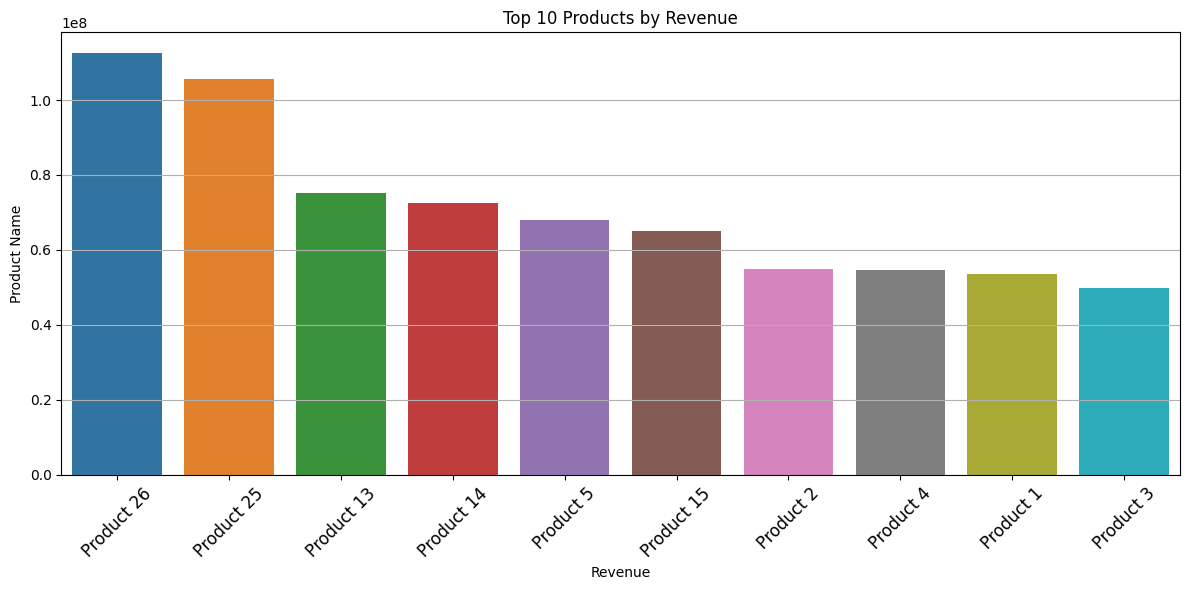

In [152]:
product_revenue = df_new.groupby('product_name')['revenue'].sum().reset_index()

# Get top 10 products by revenue
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)

# Plot bar chart using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='product_name', y='revenue', data=top_10_products, palette='tab10')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Name')
plt.xticks(rotation=45, fontsize=12)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()



/tmp/ipykernel_17403/1737795689.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_name', y='revenue', data=top_10_products, palette='tab10')


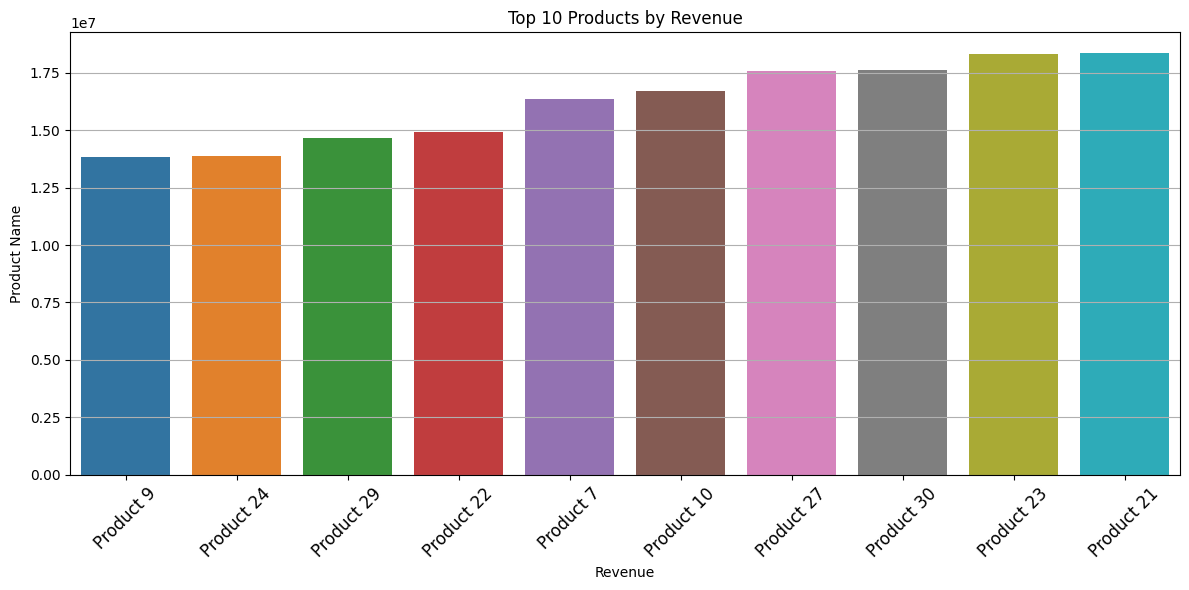

In [154]:
product_revenue = df_new.groupby('product_name')['revenue'].sum().reset_index()

# Get top 10 products by revenue
top_10_products = product_revenue.sort_values(by='revenue', ascending=True).head(10)

# Plot bar chart using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='product_name', y='revenue', data=top_10_products, palette='tab10')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Name')
plt.xticks(rotation=45, fontsize=12)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## Sales by channel pie chart

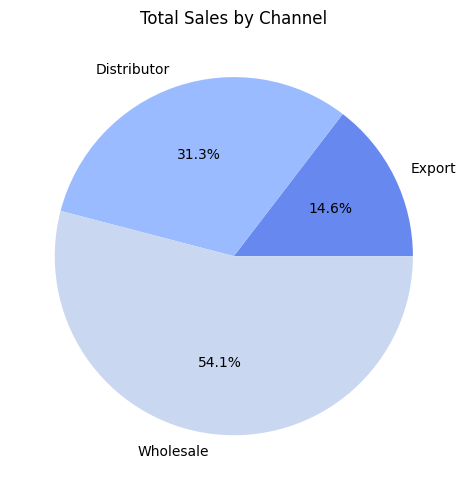

In [155]:
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=True)

plt.figure(figsize=(5, 5))

plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm')
)

plt.title('Total Sales by Channel')

plt.tight_layout()

plt.show()

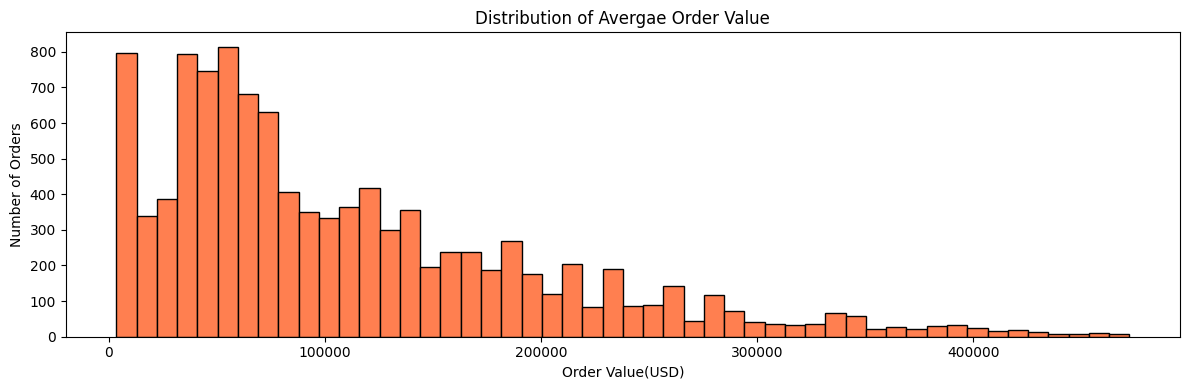

In [157]:
#average order value (AOV) distribution

aov = df.groupby('order_number')['revenue'].sum()

plt.figure(figsize=(12,4))
plt.hist(
    aov,
    bins=50,
    color='coral',
    edgecolor='black'
)

plt.title('Distribution of Avergae Order Value')
plt.xlabel('Order Value(USD)')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()

In [160]:
## Unit price Distribution
# top 10 sttes by revenue and order count
# average profit margin by channel
# top and bottom 10 customer by renevue
# customer segmentaion Revenue vs Profit margin


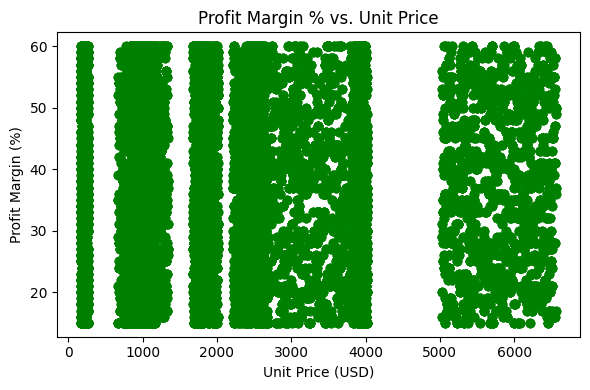

In [161]:


# Calculate profit margin percentage for each record
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot unit price vs. profit margin percentage
plt.scatter(
    df['unit_price'],            # X-axis: unit price in USD
    df['profit_margin_pct'],     # Y-axis: profit margin percentage
    alpha=0.6,                   # Transparency level for overlapping points
    color='green'                # Point color
)

# Add title and axis labels
plt.title('Profit Margin % vs. Unit Price')  # Chart title
plt.xlabel('Unit Price (USD)')                # X-axis label
plt.ylabel('Profit Margin (%)')               # Y-axis label

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()
     


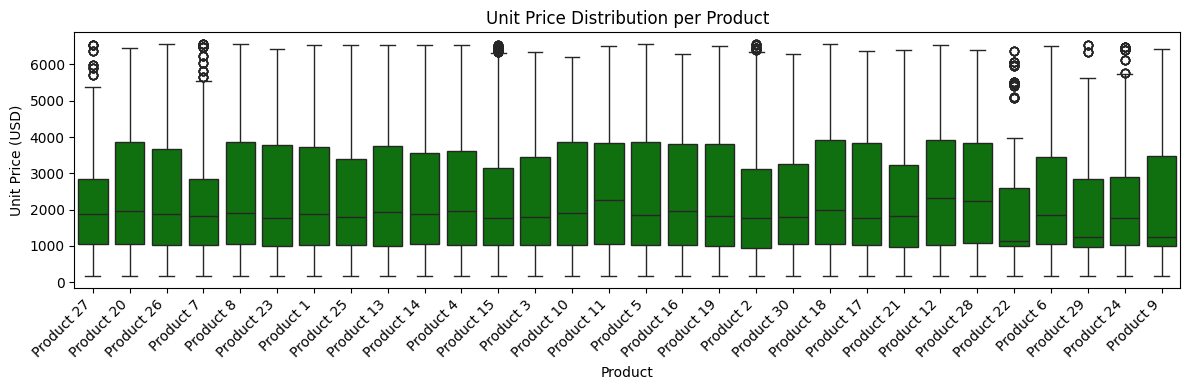

In [162]:


# Set figure size for clarity
plt.figure(figsize=(12,4))

# Create a boxplot of unit_price by product_name
sns.boxplot(
    data=df,
    x='product_name',   # X-axis: product categories
    y='unit_price',      # Y-axis: unit price values
    color='g'            # Box color
)

# Add title and axis labels
plt.title('Unit Price Distribution per Product')  # Chart title
plt.xlabel('Product')                              # X-axis label
plt.ylabel('Unit Price (USD)')                     # Y-axis label

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()
     



/tmp/ipykernel_17403/2202364400.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


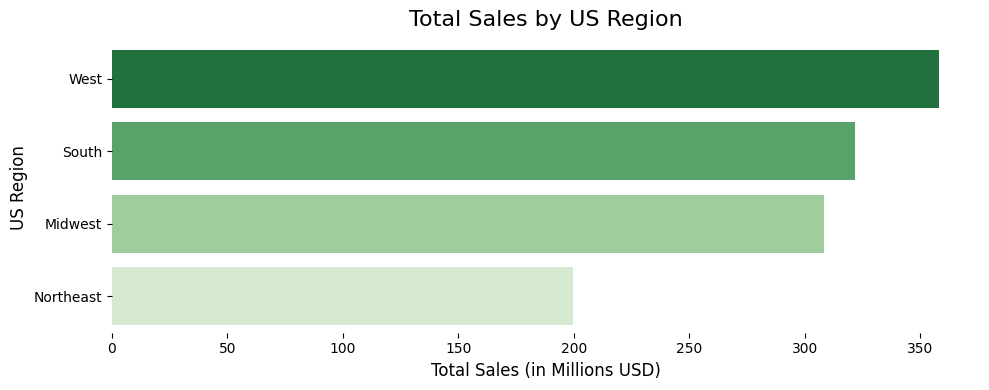

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aggregate total sales by region (in millions)
region_sales = (
    df
    .groupby('us_region')['revenue']
    .sum()
    .sort_values(ascending=False)  # so bars go top→bottom
    / 1e6                         # convert to millions
)

# 2. Plot
plt.figure(figsize=(10, 4))
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='Greens_r'          # dark→light green
)

# 3. Formatting
plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

/tmp/ipykernel_17403/31242119.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_17403/31242119.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


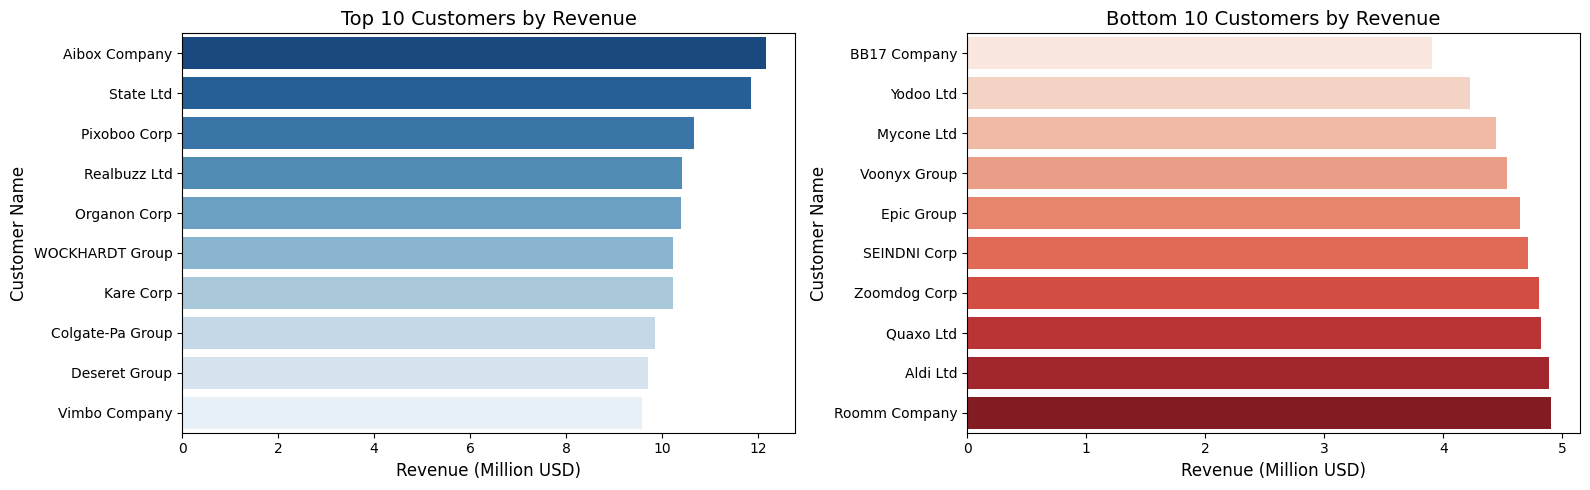

In [165]:
top_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=False) # Sort from highest to lowest
      .head(10)                     # Keep top 10 customers
)

# 🔻 Calculate total revenue per customer and select bottom 10
bottom_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=True)  # Sort from lowest to highest
      .head(10)                     # Keep bottom 10 customers
)

# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Top 10 customers by revenue (converted to millions)
sns.barplot(
    x=top_rev.values / 1e6,    # X-axis: revenue in millions
    y=top_rev.index,           # Y-axis: customer names
    palette='Blues_r',         # Color palette (reversed blues)
    ax=axes[0]                 # Draw on the left subplot
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)         # Title
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[0].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Plot 2: Bottom 10 customers by revenue (converted to millions)
sns.barplot(
    x=bottom_rev.values / 1e6, # X-axis: revenue in millions
    y=bottom_rev.index,        # Y-axis: customer names
    palette='Reds',            # Color palette (reds)
    ax=axes[1]                 # Draw on the right subplot
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)      # Title
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[1].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Adjust layout to prevent overlap and display both charts
plt.tight_layout()
plt.show()

/tmp/ipykernel_17403/1622291727.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




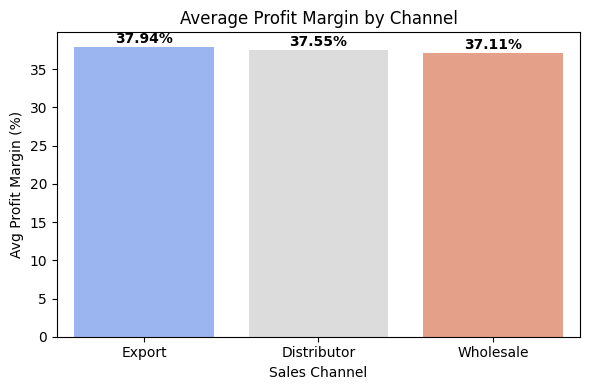

In [167]:
channel_margin = (
    df.groupby('channel')['profit_margin_pct']  # Group by sales channel
      .mean()                                  # Calculate mean profit margin %
      .sort_values(ascending=False)            # Sort channels from highest to lowest margin
)

# 2️⃣ Set the figure size for clarity
plt.figure(figsize=(6, 4))

# 3️⃣ Plot a bar chart of average profit margin by channel
ax = sns.barplot(
    x=channel_margin.index,    # X-axis: channel names
    y=channel_margin.values,   # Y-axis: average profit margin values
    palette='coolwarm'         # Color palette for bars
)

# 4️⃣ Add chart title and axis labels
plt.title('Average Profit Margin by Channel')  # Main title
plt.xlabel('Sales Channel')                    # X-axis label
plt.ylabel('Avg Profit Margin (%)')             # Y-axis label

# 5️⃣ Annotate each bar with its exact margin percentage
for i, v in enumerate(channel_margin.values):
    ax.text(
        i,                  # X position (bar index)
        v + 0.5,            # Y position (bar height + small offset)
        f"{v:.2f}%",        # Text label showing percentage with two decimals
        ha='center',        # Center-align the text horizontally
        fontweight='bold'   # Bold font for readability
    )

# 6️⃣ Adjust layout to prevent clipping and display the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_17403/3224288524.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




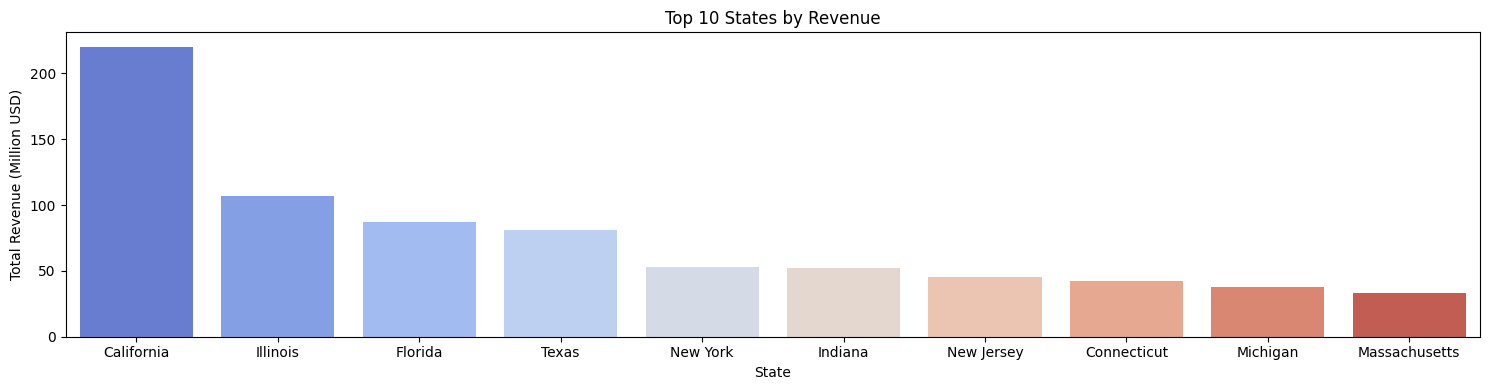

/tmp/ipykernel_17403/3224288524.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




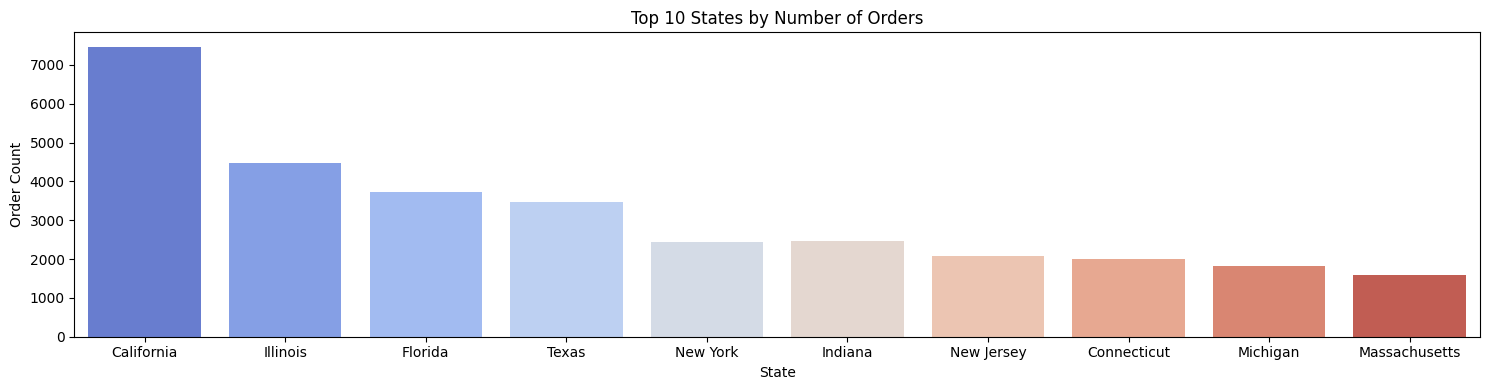

In [168]:


# Aggregate total revenue and unique order count per state
state_rev = df.groupby('state_name').agg(
    revenue=('revenue', 'sum'),          # Sum up revenue per state
    orders=('order_number', 'nunique')   # Count unique orders per state
).sort_values('revenue', ascending=False).head(10)  # Keep top 10 by revenue

# Plot 1: Top 10 states by revenue (scaled to millions)
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['revenue'] / 1e6,        # Y-axis: revenue in millions
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Revenue')     # Chart title
plt.xlabel('State')                       # X-axis label
plt.ylabel('Total Revenue (Million USD)') # Y-axis label
plt.tight_layout()                        # Adjust layout
plt.show()                                # Display the plot

# Plot 2: Top 10 states by number of orders
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['orders'],               # Y-axis: order counts
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Number of Orders')  # Chart title
plt.xlabel('State')                              # X-axis label
plt.ylabel('Order Count')                        # Y-axis label
plt.tight_layout()                               # Adjust layout
plt.show()                                       # Display the plot
     


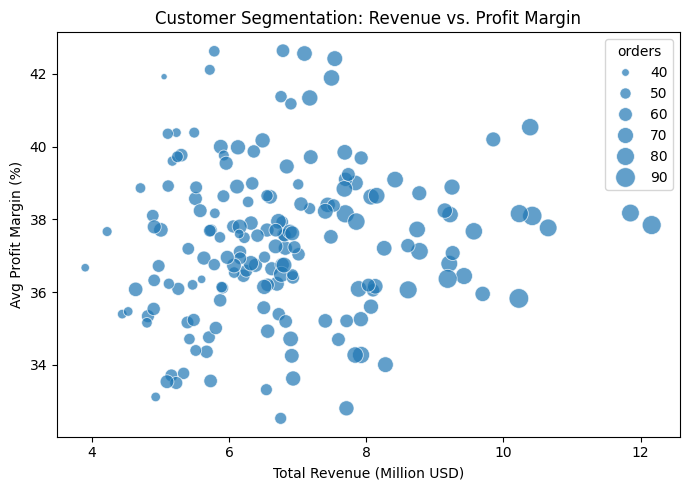

In [169]:

# Aggregate metrics per customer
cust_summary = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',        # <-- use revenue in millions
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  # <-- updated label
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()

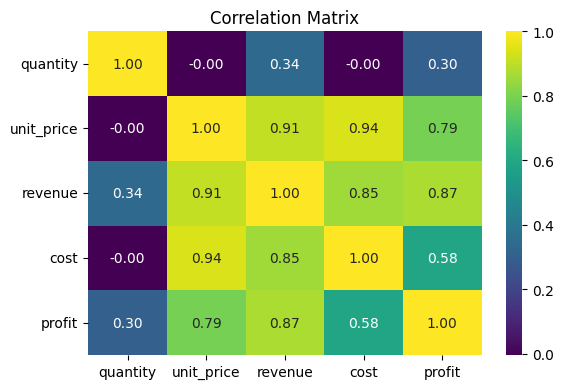

In [170]:
# List numeric columns to include in the correlation calculation
num_cols = ['quantity', 'unit_price', 'revenue', 'cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    corr,           # Data: correlation matrix
    annot=True,     # Display the correlation coefficients on the heatmap
    fmt=".2f",      # Format numbers to two decimal places
    cmap='viridis'  # Color palette for the heatmap
)

# Add title for context
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the heatmap
plt.show()

In [171]:
df

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,...,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month,year_month,month
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,2014-01,2014-01,January
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,2014-01,2014-01,January
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,2014-01,2014-01,January
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,2014-01,2014-01,January
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,2014-01,2014-01,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61621,SO - 0003524,2017-12-31,Zooveo Company,Wholesale,Product 1,9,984.9,8864.1,512.148,MO,...,Midwest,39.08547,-94.35210,3016489.209,4609.332,4254.768,48.0,2017-12,2017-12,December
61622,SO - 0004785,2017-12-31,Wordware Company,Wholesale,Product 3,12,201.0,2412.0,90.450,PA,...,Northeast,39.95234,-75.16379,2642352.432,1085.400,1326.600,55.0,2017-12,2017-12,December
61623,SO - 0004950,2017-12-31,Dynazzy Company,Distributor,Product 6,9,3825.7,34431.3,3098.817,FL,...,South,29.13832,-80.99561,1672229.416,27889.353,6541.947,19.0,2017-12,2017-12,December
61624,SO - 0006829,2017-12-31,Pixoboo Corp,Distributor,Product 6,5,1835.8,9179.0,972.974,CT,...,Northeast,41.22509,-73.06111,1672229.416,4864.870,4314.130,47.0,2017-12,2017-12,December


In [172]:


# Export Final DataFrame to CSV
df.to_csv('eda_completed_data.csv', index=False)
     
